### Importing Dependencies

In [1]:
from random import randint as rnd
from random import shuffle
import matplotlib.pyplot as plt
import cv2
import numpy as np
from math import sqrt

### Setting the Problem and Algorithms Parameters

In [2]:
N = 20

WIDTH = 1000
HEIGHT = 1000

MAX_POPULATION = 500
MUTATION_RATE = 0.8

MAIN_EPOCH = 5
SUB_EPOCH = 200

### City Randomizer Function

In [3]:
def city_randomizer(n, w, h):
    _list = []
    padding=20
    i = 0
    while i<n:
        x=rnd(padding,w-padding)
        y=rnd(padding,h-padding)
        if (x,y) not in _list:
            _list.append((x,y))
            i+=1
    return _list

### Initial Population Function

In [4]:
def new_path(n):
    path = [i for i in range(n)]
    shuffle(path)
    return path+[None]
def init_population(n, m):
    population_list = [new_path(n) for i in range(m)]
    return population_list

### Cross Over Function

In [5]:
def cross_over(population_list, n, m):
    for i in range(m):
        population_list.append(population_list[i][:n]+[None])
    return population_list

### Mutation Function

In [6]:
def swap(lst, index1, index2):
    lst[index1], lst[index2] = lst[index2], lst[index1]
    return lst
def mutation(population_list, n , m, r):
    choosen_ones = [i for i in range(m,m*2)]
    shuffle(choosen_ones)
    choosen_ones = choosen_ones[:int(m*r)]
    for i in choosen_ones:
        cell1=rnd(0,n-1)
        cell2=rnd(0,n-1)
        population_list[i] = swap(population_list[i], cell1, cell2)
    return population_list

### Fitness Function

In [7]:
def transformer(cities, path):
    for i in range(len(path)):
        path[i]=cities[path[i]]
    return path
def distance(path):
    dis = 0
    for i in range(len(path)-1):
        dis+=sqrt(((path[i][0]-path[i+1][0])**2) + ((path[i][1]-path[i+1][1])**2))
    return dis
def fitness(population_list, cities_locations, n):
    length = len(population_list)
    for i in range(length):
        if population_list[i][n]==None:
            path = transformer(cities_locations, population_list[i][:n]+[population_list[i][0]])
            population_list[i][n]=distance(path)
    return population_list

### Visualization Functions

In [8]:
def city_drawer(img, c_locations, color):
    for city in c_locations:
        img = cv2.circle(img, (city[0],city[1]), 5, color, -1)
    return img
def path_drawer(img, path, color):
    for i in range(len(path)-1):
        img = cv2.line(img, path[i], path[i+1], color, 2)
    return img

### Main

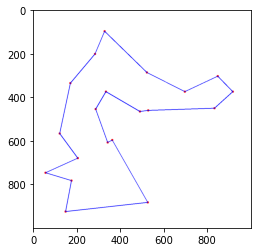

Best Solution: [9, 11, 4, 7, 19, 12, 8, 2, 3, 5, 10, 16, 1, 6, 15, 13, 14, 17, 18, 0, 3451.5524175720975]


In [9]:
img = np.full((WIDTH,HEIGHT,3),255,np.uint8)
cities_locations = city_randomizer(N, WIDTH, HEIGHT)
current_population = init_population(N, MAX_POPULATION)
for i in range(SUB_EPOCH):
    current_population = cross_over(current_population, N, MAX_POPULATION)
    current_population = mutation(current_population, N, MAX_POPULATION, MUTATION_RATE)
    current_population = fitness(current_population, cities_locations, N)
    current_population = sorted(current_population, key=lambda x:x[N])
    current_population = current_population[:MAX_POPULATION]
    #print(f"{i+1} => Best Solution so far:", current_population[0])
else:
    img = city_drawer(img, cities_locations, (255,0,0))
    current_path = transformer(cities_locations, current_population[0][:N])
    current_path.append(tuple(current_path[0]))
    img = path_drawer(img, current_path, (0,0,255))
    plt.imshow(img)
    #plt.title(f"{current_population[0]}")
    plt.show()
    print("Best Solution:",current_population[0])